<a href="https://colab.research.google.com/github/chungbinpark/ML-tutorial/blob/main/2_2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%82%B4%ED%8E%B4%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2-2. 판다스를 활용한 데이터 조사

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/taehojo/data.git

# 피마 인디언 당뇨병 데이터셋을 불러옵니다.
df = pd.read_csv('./data/pima-indians-diabetes3.csv')

In [ ]:
np.shape(df)

In [ ]:
# 처음 5줄을 봅니다.
df.tail(5)

In [ ]:
# 정상과 당뇨 환자가 각각 몇 명씩인지 조사해 봅니다.
df["diabetes"].value_counts()

In [ ]:
# 각 정보별 특징을 좀 더 자세히 출력합니다.
df.describe()

In [ ]:
# 각 항목이 어느 정도의 상관 관계를 가지고 있는지 알아봅니다.
df.corr()

In [ ]:
# 데이터 간의 상관 관계를 그래프로 표현해 봅니다.
colormap = plt.cm.gist_heat   # 그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))   # 그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울수록 밝은색으로 표시되게 합니다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

## 4. 중요한 데이터 추출하기

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# plasma를 기준으로 각각 정상과 당뇨가 어느 정도 비율로 분포하는지 살펴봅니다.
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30, label=['normal','diabetes'])
plt.legend()

In [ ]:
# BMI를 기준으로 각각 정상과 당뇨가 어느 정도 비율로 분포하는지 살펴봅니다.
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30, label=['normal','diabetes'])
plt.legend()

## 5. 피마 인디언 당뇨병 예측 실행

In [ ]:
# 세부 정보를 X로 지정합니다.
X = df.iloc[:,0:8]
# 당뇨병 여부를 y로 지정합니다.
y = df.iloc[:,8]

In [ ]:
np.shape(X), np.shape(y)

In [ ]:
y

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델을 설정합니다.
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid',name='Dense_3'))
model.summary()

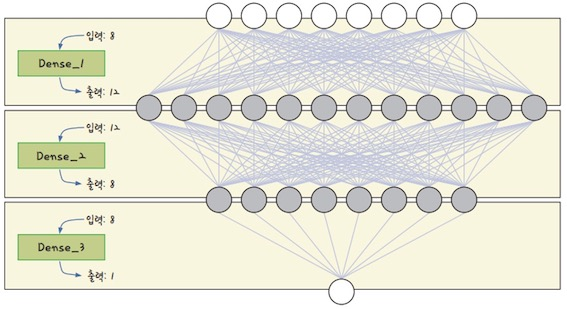

In [ ]:
# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X, y, epochs=100, batch_size=5)